# Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

In [63]:
df = pd.read_csv(f'data{os.sep}heart.csv')
data = df.copy()

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [64]:
df["Age"] = pd.qcut(x=data["Age"], q=4, labels=["Young adults", "middleage", "almost old", "old"])
df["RestingBP"] = pd.qcut(x=data["RestingBP"], q=3, labels=["low", "medium", "high"])
df["Cholesterol"] = pd.qcut(x=data["Cholesterol"], q=3, labels=["low", "medium", "high"])
df["MaxHR"] = pd.qcut(x=data["MaxHR"], q=3, labels=["low", "medium", "high"])
df["Oldpeak"] = pd.qcut(x=data["Oldpeak"], q=3, labels=["low", "medium", "high"])

In [20]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,Young adults,M,ATA,medium,high,0,Normal,high,N,low,Up,0
1,middleage,F,NAP,high,low,0,Normal,high,N,medium,Flat,1
2,Young adults,M,ATA,medium,high,0,ST,low,N,low,Up,0
3,middleage,F,ASY,medium,medium,0,Normal,low,Y,high,Flat,1
4,middleage,M,NAP,high,low,0,Normal,low,N,low,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,Young adults,M,TA,low,high,0,Normal,medium,N,medium,Flat,1
914,old,M,ASY,high,low,1,Normal,medium,N,high,Flat,1
915,almost old,M,ASY,medium,low,0,Normal,low,Y,medium,Flat,1
916,almost old,F,ATA,medium,medium,0,LVH,high,N,low,Flat,1


# Maximum Likelihood Estimator

In [21]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

## Creating train e test

In [22]:
Y = df["HeartDisease"]
X = df.drop("HeartDisease", axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

## Creating a naive bayes network

In [23]:
columns = list(df.columns)
network = [("HeartDisease", x) for x in columns[:-1]]
nb_model = BayesianNetwork(network)

## Creating the estimator on the train set and applying its result to our network

In [24]:
estimator = MaximumLikelihoodEstimator(nb_model, xtrain.join(ytrain))

In [25]:
for _ in estimator.get_parameters():
    nb_model.add_cpds(_)

/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True i

## Make a prediction based on the CPDS given

In [26]:
ypred = nb_model.predict(xtest)

100%|██████████| 218/218 [00:00<00:00, 789.51it/s]


In [27]:
accuracy_score(ypred, ytest)

0.8434782608695652

In [28]:
roc_auc_score(ytest, ypred, average="weighted")

0.8432726993629596

# Bayesian estimator

In [29]:
from pgmpy.estimators import BayesianEstimator

In [30]:
nb_model = BayesianNetwork(network)

In [31]:
estimator = BayesianEstimator(nb_model, xtrain.join(ytrain))

In [32]:
for _ in estimator.get_parameters():
    nb_model.add_cpds(_)

/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True i

In [33]:
ypred = nb_model.predict(xtest)

 15%|█▍        | 32/218 [00:00<00:00, 270.43it/s]

100%|██████████| 218/218 [00:00<00:00, 661.91it/s]


In [34]:
accuracy_score(ypred, ytest)

0.8434782608695652

In [35]:
roc_auc_score(ytest, ypred, average="weighted")

0.8432726993629596

# Dropping some columns

In [19]:
to_drop = ["Month", "DayofMonth", "DayOfWeek", "Distance"]
df_dropped = df.drop(labels=to_drop, axis=1)

columns = list(df_dropped.columns)
network = [("Delayed", x) for x in columns[:-1]]
nb_model = BayesianNetwork(network)

Y = df_dropped["Delayed"]
X = df_dropped.drop("Delayed", axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

In [20]:
estimator = MaximumLikelihoodEstimator(nb_model, xtrain.join(ytrain))
for _ in estimator.get_parameters():
    nb_model.add_cpds(_)

/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)


In [21]:
ypred = nb_model.predict(xtest)

  0%|          | 0/16339 [00:00<?, ?it/s]

100%|██████████| 16339/16339 [00:17<00:00, 932.30it/s] 


In [22]:
accuracy_score(ypred, ytest)

0.81544

In [23]:
roc_auc_score(ytest, ypred, average="weighted")

0.5117791120428491

# Custom acustic network

In [24]:
df.columns
Y = df["Delayed"]
X = df.drop("Delayed", axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

In [25]:
network = [
    ("Delayed", "UniqueCarrier"),
    ("Delayed", "DepTime"),
    ("DepTime", "Season"),
    ("DepTime", "DayOfWeek"),
    ("DepTime", "Weekend"),
    ("DepTime", "DayofMonth"),
    ("DepTime", "Month"),
    ("Distance", "Origin"),
    ("Distance", "Dest")
]

In [26]:
nb_model = BayesianNetwork(network)

In [27]:
estimator = BayesianEstimator(nb_model, xtrain.join(ytrain))

for _ in estimator.get_parameters():
    nb_model.add_cpds(_)

/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([variable] + parents).size().unstack(parents)
/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimators/base.py:170: FutureWarning: The default of observed=False is deprecated and will be changed to True i

In [28]:
ypred = nb_model.predict(xtest)

  0%|          | 0/24870 [00:00<?, ?it/s]

 12%|█▏        | 3056/24870 [00:04<00:34, 628.65it/s]WARNING:pgmpy:Found unknown state name. Trying to switch to using all state names as state numbers


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
accuracy_score(ytest, ypred)

0.80728

In [ ]:
roc_auc_score(ytest, ypred, average="weighted")

0.5

 # Learning from data
 #### In collaboration with google gemini

In [36]:
from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch

# PC

In [57]:
#to_drop = ["FastingBS", "Cholesterol"]
#df = df.drop(labels=to_drop, axis=1)
columns = list(df.columns)
network = [("HeartDisease", x) for x in columns[:-1]]
nb_model = BayesianNetwork(network)

Y = df["HeartDisease"]
X = df.drop("HeartDisease", axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

In [58]:
warnings.filterwarnings("INFO")

AssertionError: invalid action: 'INFO'

In [62]:
est = PC(data=df)
estimated_model = est.estimate(variant="parallel", max_cond_vars=4)

Working for n conditional variables: 0:   0%|          | 0/4 [00:00<?, ?it/s]/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimators/CITests.py:539: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimators/CITests.py:539: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
/home/sbrodox/Scrivania/BayesianClassifier/env/lib/python3.10/site-packages/pgmpy/estimat

KeyboardInterrupt: 

In [60]:

import networkx as nx

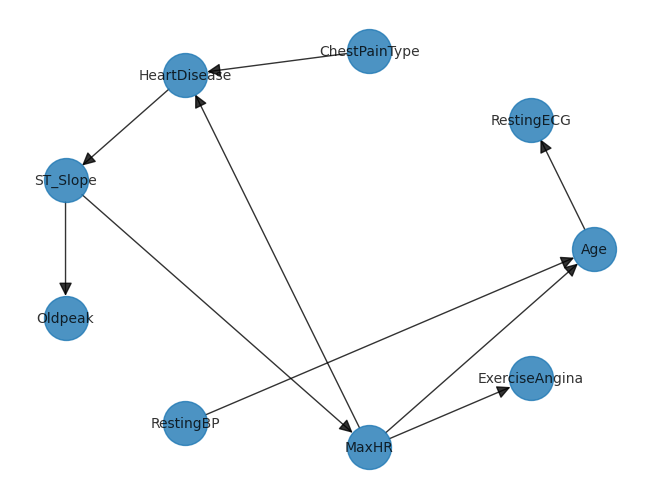

In [61]:
nx.draw_circular(estimated_model, with_labels=True, arrowsize=20, node_size=1000, font_size=10, alpha=0.8)
plt.show()

In [51]:
nb_model = BayesianNetwork(estimated_model)

NetworkXError: Input is not a correct NetworkX graph.

In [ ]:
estimator = MaximumLikelihoodEstimator(nb_model, xtrain.join(ytrain))

for _ in estimator.get_parameters():
    nb_model.add_cpds(_)


ypred = nb_model.predict(xtest)